In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import pi
from math import exp
from sklearn.ensemble import IsolationForest

In [7]:
%matplotlib inline

In [8]:
#data
F_9A = pd.read_csv('USROP_A 0 N-NA_F-9_Ad.csv')
F_9 = pd.read_csv('USROP_A 6 N-SH_F-9d.csv')
F_5 = pd.read_csv('USROP_A 5 N-SH-F-5d.csv')
F_7 = pd.read_csv('USROP_A 1 N-S_F-7d.csv')
F_14 = pd.read_csv('USROP_A 2 N-SH_F-14d.csv')
F_15 = pd.read_csv('USROP_A 3 N-SH-F-15d.csv')
F_15S = pd.read_csv('USROP_A 4 N-SH_F-15Sd.csv')

In [9]:
#importing trajectory
F_9A_incl = pd.read_csv('trajectory/1.csv')
F_9_incl = pd.read_csv('trajectory/F_9/3.csv')
F_5_incl = pd.read_csv('trajectory/F_5/4.csv')
F_7_incl = pd.read_csv('trajectory/F_7/3.csv')
F_14_incl = pd.read_csv('trajectory/F_14/4.csv')
F_15_incl = pd.read_csv('trajectory/F_15/2.csv')
F_15S_incl = pd.read_csv('trajectory/F_15S/2.csv')

In [10]:
#inclination F_9A
inclination_9A = F_9A_incl.loc[:,['md/#text','incl/#text','dls/#text','azi/#text']]

#adding new rows with angles (from OpenLab)
a496 = [496.7, 8.93, 3, 199.58]
a537 = [537.6, 14.03, 3.94, 193.34]
a1201 = [1201, 58.83, 0, 190.55]
inclination_9A = pd.DataFrame(np.insert(inclination_9A.values, 1, a496, axis=0))
inclination_9A = pd.DataFrame(np.insert(inclination_9A.values, 2, a537, axis=0))
inclination_9A = pd.DataFrame(np.insert(inclination_9A.values, 23, a1201, axis=0))
inclination_9A.columns = ['MD','incl','dls','azimut']

In [11]:
#wrong
inclination_9 = F_9_incl.loc[:,['md/#text','incl/#text','dls/#text','azi/#text']]
inclination_5 = F_5_incl.loc[:,['md/#text','incl/#text','dls/#text','azi/#text']]
#fit
inclination_7 = F_7_incl.loc[:,['md/#text','incl/#text','dls/#text','azi/#text']]
inclination_14 = F_14_incl.loc[:,['md/#text','incl/#text','dls/#text','azi/#text']]
inclination_15 = F_15_incl.loc[:,['md/#text','incl/#text','dls/#text','azi/#text']]
inclination_15S = F_15S_incl.loc[:,['md/#text','incl/#text','dls/#text','azi/#text']]
#renaming columns
inclination_9.columns = ['MD','incl','dls','azimut']
inclination_5.columns = ['MD','incl','dls','azimut']
inclination_7.columns = ['MD','incl','dls','azimut']
inclination_14.columns = ['MD','incl','dls','azimut']
inclination_15.columns = ['MD','incl','dls','azimut']
inclination_15S.columns = ['MD','incl','dls','azimut']

In [12]:
inclination_7.incl.head()

0    0.00
1    0.00
2    0.23
3    0.26
4    0.30
Name: incl, dtype: float64

In [16]:
F_9A_raw = pd.read_csv('Norway-NA-15_$47$_9-F-9 A depth.csv')
Columns = pd.Series(F_9A_raw.columns)

In [17]:
F_9A_raw['Total Downhole RPM rpm'].isna().value_counts()

True     11067
False     5603
Name: Total Downhole RPM rpm, dtype: int64

In [18]:
F_9A[F_9A['Measured Depth m']>496].head()

,Unnamed: 0,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
19,19,496.062,4.808079,9317.575006,0.013558,39.822120,84.0,2784.321942,1.21,311.15,95.131928,495.730378,157.03
20,20,496.129,4.808079,9317.575006,0.013558,39.822120,84.0,2784.321942,1.21,311.15,95.131928,495.730378,157.03
21,21,496.519,4.132226,9389.556272,0.013558,40.535352,84.0,2784.321942,1.21,311.15,95.567376,496.181786,144.72
22,22,496.522,4.132226,9389.556272,0.013558,40.535352,84.0,2784.321942,1.21,311.15,95.567376,496.181786,144.72
23,23,496.580,4.132226,9389.556272,0.013558,40.535352,84.0,2784.321942,1.21,311.15,95.567376,496.181786,144.72


In [19]:
#input needed parameters to calculate MSE
F_9A_MSE = F_9A.loc[:,['Measured Depth m', 'Weight on Bit kkgf', 'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 'Diameter mm']]
F_9_MSE = F_9.loc[:,['Measured Depth m', 'Weight on Bit kkgf', 'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 'Diameter mm']]
F_5_MSE = F_5.loc[:,['Measured Depth m', 'Weight on Bit kkgf', 'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 'Diameter mm']]
F_7_MSE = F_7.loc[:,['Measured Depth m', 'Weight on Bit kkgf', 'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 'Diameter mm']]
F_14_MSE = F_14.loc[:,['Measured Depth m', 'Weight on Bit kkgf', 'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 'Diameter mm']]
F_15_MSE = F_15.loc[:,['Measured Depth m', 'Weight on Bit kkgf', 'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 'Diameter mm']]
F_15S_MSE = F_15S.loc[:,['Measured Depth m', 'Weight on Bit kkgf', 'Average Surface Torque kN.m', 'Rate of Penetration m/h', 'Average Rotary Speed rpm', 'Diameter mm']]
#renaming columns 
F_9A_MSE.columns = ['MD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter']
F_9_MSE.columns = ['MD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter']
F_5_MSE.columns = ['MD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter']
F_7_MSE.columns = ['MD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter']
F_14_MSE.columns = ['MD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter']
F_15_MSE.columns = ['MD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter']
F_15S_MSE.columns = ['MD', 'WOB', 'Torque', 'ROP', 'RPM', 'Diameter']

In [20]:
incl_nan_9A = []
incl_nan_9 = []
incl_nan_5 = []
incl_nan_7 = []
incl_nan_14 = []
incl_nan_15 = []
incl_nan_15S = []
for i in range(len(F_9A_MSE.MD)):
    incl_nan_9A.append(np.nan)
F_9A_MSE['incl'] = incl_nan_9A
for i in range(len(F_9_MSE.MD)):
    incl_nan_9.append(np.nan)
F_9_MSE['incl'] = incl_nan_9
for i in range(len(F_5_MSE.MD)):
    incl_nan_5.append(np.nan)
F_5_MSE['incl'] = incl_nan_5
for i in range(len(F_7_MSE.MD)):
    incl_nan_7.append(np.nan)
F_7_MSE['incl'] = incl_nan_7
for i in range(len(F_14_MSE.MD)):
    incl_nan_14.append(np.nan)
F_14_MSE['incl'] = incl_nan_14
for i in range(len(F_15_MSE.MD)):
    incl_nan_15.append(np.nan)
F_15_MSE['incl'] = incl_nan_15
for i in range(len(F_15S_MSE.MD)):
    incl_nan_15S.append(np.nan)
F_15S_MSE['incl'] = incl_nan_15S

In [ ]:
for i in range(len(F_9A_MSE)):
    for j in range(len(inclination_9A)):
        if int(F_9A_MSE.MD[i]) == int(inclination_9A.MD[j]):
            F_9A_MSE.incl[i] = inclination_9A.incl[j]
for i in range(len(F_9_MSE)):
    for j in range(len(inclination_9)):
        if int(F_9_MSE.MD[i]) == int(inclination_9.MD[j]):
            F_9_MSE.incl[i] = inclination_9.incl[j]
for i in range(len(F_5_MSE)):
    for j in range(len(inclination_5)):
        if int(F_5_MSE.MD[i]) == int(inclination_5.MD[j]):
            F_5_MSE.incl[i] = inclination_5.incl[j]
for i in range(len(F_7_MSE)):
    for j in range(len(inclination_7)):
        if int(F_7_MSE.MD[i]) == int(inclination_7.MD[j]):
            F_7_MSE.incl[i] = inclination_7.incl[j]
for i in range(len(F_14_MSE)):
    for j in range(len(inclination_14)):
        if int(F_14_MSE.MD[i]) == int(inclination_14.MD[j]):
            F_14_MSE.incl[i] = inclination_14.incl[j]
for i in range(len(F_15_MSE)):
    for j in range(len(inclination_15)):
        if int(F_15_MSE.MD[i]) == int(inclination_15.MD[j]):
            F_15_MSE.incl[i] = inclination_15.incl[j]
for i in range(len(F_15S_MSE)):
    for j in range(len(inclination_15S)):
        if int(F_15S_MSE.MD[i]) == int(inclination_15S.MD[j]):
            F_15S_MSE.incl[i] = inclination_15S.incl[j]

In [ ]:
#interpolating
F_9A_MSE.interpolate(method='polynomial', inplace=True, limit_area=None, order=1)
F_9_MSE.interpolate(method='polynomial', inplace=True, limit_area=None, order=1)
F_5_MSE.interpolate(method='polynomial', inplace=True, limit_area=None, order=1)
F_7_MSE.interpolate(method='polynomial', inplace=True, limit_area=None, order=1)
F_14_MSE.interpolate(method='polynomial', inplace=True, limit_area=None, order=1)
F_15_MSE.interpolate(method='polynomial', inplace=True, limit_area=None, order=1)
F_15S_MSE.interpolate(method='polynomial', inplace=True, limit_area=None, order=1)

In [ ]:
plt.style.use('seaborn')
fig, ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.plot(F_15_MSE.MD, F_15_MSE.incl)

In [ ]:
#MSE computation
m = 0.35
mb = 0.85
MSE_9A = []
MSE_9 = []
MSE_5 = []
MSE_7 = []
MSE_14 = []
MSE_15 = []
MSE_15S = []
for i in range(len(F_9A_MSE.MD)):
    MSE_9A.append((F_9A_MSE.WOB[i]*exp(-m*F_9A_MSE.incl[i]*pi/180))*1000*9.81/(pi/4*(F_9A_MSE.Diameter[i]/1000)**2)+2*pi*F_9A_MSE.RPM[i]/60*(mb*F_9A_MSE.WOB[i]*1000*9.81*exp(-m*F_9A_MSE.incl[i]*pi/180)*F_9A_MSE.Diameter[i]/3)/(pi/4*(F_9A_MSE.Diameter[i]/1000)**2)/(F_9A_MSE.ROP[i]/3600))
F_9A_MSE['MSE'] = MSE_9A

for i in range(len(F_9_MSE.MD)):
    MSE_9.append(F_9_MSE.WOB[i]*1000*9.81/(pi/4*(F_9_MSE.Diameter[i]/1000)**2)+2*pi*F_9_MSE.RPM[i]/60*F_9_MSE.Torque[i]*1000/(pi/4*(F_9_MSE.Diameter[i]/1000)**2)/(F_9_MSE.ROP[i]/3600))
F_9_MSE['MSE'] = MSE_9
               
for i in range(len(F_5_MSE.MD)):
    MSE_5.append(F_5_MSE.WOB[i]*1000*9.81/(pi/4*(F_5_MSE.Diameter[i]/1000)**2)+2*pi*F_5_MSE.RPM[i]/60*F_5_MSE.Torque[i]*1000/(pi/4*(F_5_MSE.Diameter[i]/1000)**2)/(F_5_MSE.ROP[i]/3600))
F_5_MSE['MSE'] = MSE_5
               
for i in range(len(F_7_MSE.MD)):
    MSE_7.append((F_7_MSE.WOB[i]*exp(-m*F_7_MSE.incl[i]))*1000*9.81/(pi/4*(F_7_MSE.Diameter[i]/1000)**2)+2*pi*F_7_MSE.RPM[i]/60*(mb*F_7_MSE.WOB[i]*1000*9.81*exp(-m*F_7_MSE.incl[i]*pi/180)*F_7_MSE.Diameter[i]/3)/(pi/4*(F_7_MSE.Diameter[i]/1000)**2)/(F_7_MSE.ROP[i]/3600))
F_7_MSE['MSE'] = MSE_7

for i in range(len(F_14_MSE.MD)):
    MSE_14.append((F_14_MSE.WOB[i]*exp(-m*F_14_MSE.incl[i]))*1000*9.81/(pi/4*(F_14_MSE.Diameter[i]/1000)**2)+2*pi*F_14_MSE.RPM[i]/60*(mb*F_14_MSE.WOB[i]*1000*9.81*exp(-m*F_14_MSE.incl[i]*pi/180)*F_14_MSE.Diameter[i]/3)/(pi/4*(F_14_MSE.Diameter[i]/1000)**2)/(F_14_MSE.ROP[i]/3600))
F_14_MSE['MSE'] = MSE_14

for i in range(len(F_15_MSE.MD)):
    MSE_15.append((F_15_MSE.WOB[i]*exp(-m*F_15_MSE.incl[i]))*1000*9.81/(pi/4*(F_15_MSE.Diameter[i]/1000)**2)+2*pi*F_15_MSE.RPM[i]/60*(mb*F_15_MSE.WOB[i]*1000*9.81*exp(-m*F_15_MSE.incl[i]*pi/180)*F_15_MSE.Diameter[i]/3)/(pi/4*(F_15_MSE.Diameter[i]/1000)**2)/(F_15_MSE.ROP[i]/3600))
F_15_MSE['MSE'] = MSE_15

for i in range(len(F_15S_MSE.MD)):
    MSE_15S.append((F_15S_MSE.WOB[i]*exp(-m*F_15S_MSE.incl[i]))*1000*9.81/(pi/4*(F_15S_MSE.Diameter[i]/1000)**2)+2*pi*F_15S_MSE.RPM[i]/60*(mb*F_15S_MSE.WOB[i]*1000*9.81*exp(-m*F_15S_MSE.incl[i]*pi/180)*F_15S_MSE.Diameter[i]/3)/(pi/4*(F_15S_MSE.Diameter[i]/1000)**2)/(F_15S_MSE.ROP[i]/3600))
F_15S_MSE['MSE'] = MSE_15S


In [ ]:
F_9A_MSE[F_9A_MSE.MD>890].head(20)

In [ ]:
#converting Depth
MD_9A = F_9A_MSE.MD.values
MD_9 = F_9_MSE.MD.values
MD_5 = F_5_MSE.MD.values
MD_7 = F_7_MSE.MD.values
MD_14 = F_14_MSE.MD.values
MD_15 = F_15_MSE.MD.values
MD_15S = F_15S_MSE.MD.values
for i in range(len(MD_9A)):
    MD_9A[i] = -MD_9A[i]
for i in range(len(MD_9)):
    MD_9[i] = -MD_9[i]
for i in range(len(MD_5)):
    MD_5[i] = -MD_5[i]
for i in range(len(MD_7)):
    MD_7[i] = -MD_7[i]
for i in range(len(MD_14)):
    MD_14[i] = -MD_14[i]
for i in range(len(MD_15)):
    MD_15[i] = -MD_15[i]
for i in range(len(MD_15S)):
    MD_15S[i] = -MD_15S[i]

In [ ]:
#ROP and WOB relation
ROP_WOB_relation_9A = []
for i in range(len(F_9A_MSE.ROP)):
    ROP_WOB_relation_9A.append(F_9A_MSE.ROP[i]/F_9A_MSE.WOB[i])
ROP_WOB_relation_9A = np.array(ROP_WOB_relation_9A)
for i in range(len(ROP_WOB_relation_9A)):
    if ROP_WOB_relation_9A[i] > 100:
        ROP_WOB_relation_9A[i] = 10

ROP_WOB_relation_9 = []
for i in range(len(F_9_MSE.ROP)):
    ROP_WOB_relation_9.append(F_9_MSE.ROP[i]/F_9_MSE.WOB[i])
ROP_WOB_relation_9 = np.array(ROP_WOB_relation_9)
for i in range(len(ROP_WOB_relation_9)):
    if ROP_WOB_relation_9[i] > 100:
        ROP_WOB_relation_9[i] = 10

ROP_WOB_relation_5 = []
for i in range(len(F_5_MSE.ROP)):
    ROP_WOB_relation_5.append(F_5_MSE.ROP[i]/F_5_MSE.WOB[i])
ROP_WOB_relation_5 = np.array(ROP_WOB_relation_5)
for i in range(len(ROP_WOB_relation_5)):
    if ROP_WOB_relation_5[i] > 100:
        ROP_WOB_relation_5[i] = 10

ROP_WOB_relation_7 = []
for i in range(len(F_7_MSE.ROP)):
    ROP_WOB_relation_7.append(F_7_MSE.ROP[i]/F_7_MSE.WOB[i])
ROP_WOB_relation_7 = np.array(ROP_WOB_relation_7)
for i in range(len(ROP_WOB_relation_7)):
    if ROP_WOB_relation_7[i] > 100:
        ROP_WOB_relation_7[i] = 10
        
ROP_WOB_relation_14 = []
for i in range(len(F_14_MSE.ROP)):
    ROP_WOB_relation_14.append(F_14_MSE.ROP[i]/F_14_MSE.WOB[i])
ROP_WOB_relation_14 = np.array(ROP_WOB_relation_14)
for i in range(len(ROP_WOB_relation_14)):
    if ROP_WOB_relation_14[i] > 100:
        ROP_WOB_relation_14[i] = 10
        
ROP_WOB_relation_15 = []
for i in range(len(F_15_MSE.ROP)):
    ROP_WOB_relation_15.append(F_15_MSE.ROP[i]/F_15_MSE.WOB[i])
ROP_WOB_relation_15 = np.array(ROP_WOB_relation_15)
for i in range(len(ROP_WOB_relation_15)):
    if ROP_WOB_relation_15[i] > 100:
        ROP_WOB_relation_15[i] = 10
        
ROP_WOB_relation_15S = []
for i in range(len(F_15S_MSE.ROP)):
    ROP_WOB_relation_15S.append(F_15S_MSE.ROP[i]/F_15S_MSE.WOB[i])
ROP_WOB_relation_15S = np.array(ROP_WOB_relation_15S)
for i in range(len(ROP_WOB_relation_15S)):
    if ROP_WOB_relation_15S[i] > 100:
        ROP_WOB_relation_15S[i] = 10

In [ ]:
#plotting
plt.style.use('seaborn')
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,3,1)
ax.plot(F_9A_MSE.MSE[2200:3300].values,MD_9A[2200:3300])
ax1 = fig.add_subplot(1,3,2)
ax1.plot(F_9A_MSE.WOB[2200:3300].values,MD_9A[2200:3300])
ax2 = fig.add_subplot(1,3,3)
ax2.plot(ROP_WOB_relation_9A[2200:3300],MD_9A[2200:3300])
ax.set_xlabel('MSE');
ax.set_ylabel('Depth');
ax.set_title('MSE vs Depth');
ax1.set_xlabel('WOB');
ax1.set_title('WOB vs Depth');
ax2.set_xlabel('ROP/WOB');
ax2.set_title('ROP/WOB vs Depth');

In [ ]:
F_9A_MSE[F_9A_MSE.MSE>10**12].info()

In [ ]:
F_9A_MSE.loc[F_9A_MSE.MSE>0.7*10**12,['MSE']] = 0.7*10**12

In [ ]:
plt.style.use('seaborn')
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(1,7,1)
ax1.plot(F_9A_MSE.MSE.values,MD_9A)
ax2 = fig.add_subplot(1,7,2)
ax2.plot(F_9A_MSE.WOB.values,MD_9A)
ax3 = fig.add_subplot(1,7,3)
ax3.plot(ROP_WOB_relation_9A,MD_9A)
ax4 = fig.add_subplot(1,7,4)
ax4.plot(F_9A_MSE.Torque.values,MD_9A)
ax5 = fig.add_subplot(1,7,5)
ax5.plot(F_9A_MSE.ROP.values,MD_9A)
ax6 = fig.add_subplot(1,7,6)
ax6.plot(F_9A_MSE.RPM,MD_9A)
ax7 = fig.add_subplot(1,7,7)
ax7.plot(F_9A['Mud Flow In L/min'].values,MD_9A)

ax1.set_xlabel('MSE');
ax1.set_ylabel('Depth');
ax1.set_title('MSE vs Depth');
ax2.set_xlabel('WOB kkgf');
ax2.set_title('WOB vs Depth');
ax3.set_xlabel('ROP/WOB');
ax3.set_title('ROp/WOB vs Depth');
ax4.set_xlabel('Torque kN.m');
ax4.set_title('Torque vs Depth');
ax5.set_xlabel('ROP m/h');
ax5.set_title('ROP vs Depth');
ax6.set_xlabel('RPM');
ax6.set_title('RPM vs Depth');
ax7.set_xlabel('Mud Flow In L/min');
ax7.set_title('Mud Flow vs Depth');

In [ ]:
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize = (20,20))
ax1.plot(F_9_MSE.MSE.values,MD_9)
ax1.set_xlabel('MSE');
ax1.set_ylabel('Depth');
ax1.set_title('MSE vs Depth');

ax2.plot(F_9_MSE.WOB.values,MD_9)
ax2.set_xlabel('WOB kkgf');
ax2.set_title('WOB vs Depth');

ax3.plot(ROP_WOB_relation_9,MD_9)
ax3.set_xlabel('ROP/WOB');
ax3.set_title('ROp/WOB vs Depth');

ax4.plot(F_9_MSE.Torque.values,MD_9)
ax4.set_xlabel('Torque kN.m');
ax4.set_title('Torque vs Depth');

ax5.plot(F_9_MSE.ROP.values,MD_9)
ax5.set_xlabel('ROP m/h');
ax5.set_title('ROP vs Depth');

ax6.plot(F_9_MSE.RPM,MD_9)
ax6.set_xlabel('RPM');
ax6.set_title('RPM vs Depth');

ax7.plot(F_9['Mud Flow In L/min'].values,MD_9)
ax7.set_xlabel('Mud Flow In L/min');
ax7.set_title('Mud Flow vs Depth');

In [ ]:
F_5_MSE[F_5_MSE.MSE>1.1*10**10].info()

In [46]:
F_5_MSE.loc[F_5_MSE.MSE>1.1*10**10,['MSE']] = 1.1*10**10

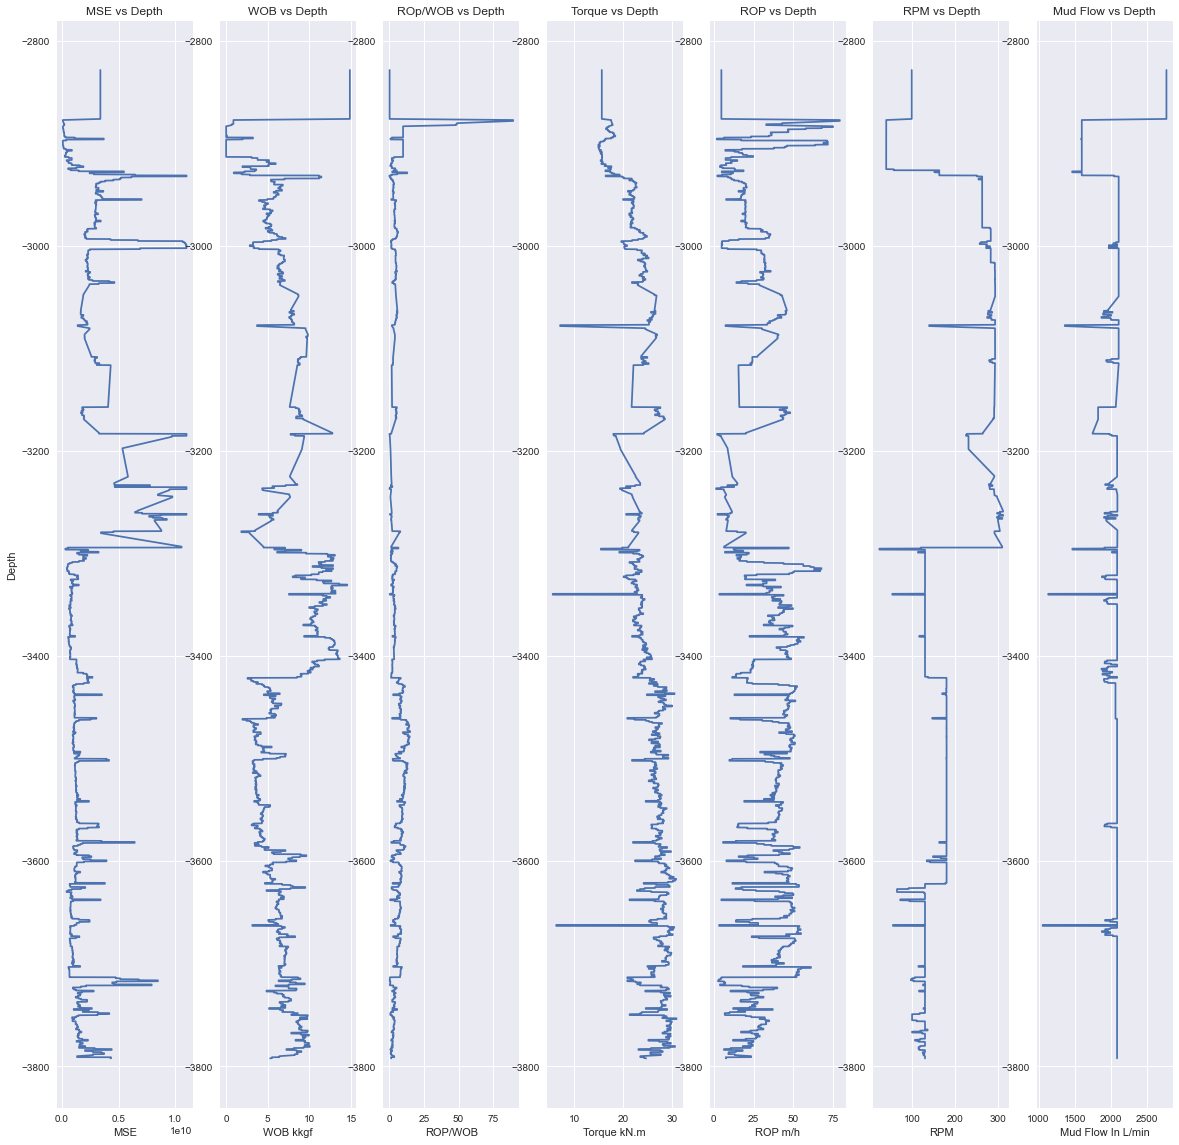

In [81]:
#F_5
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize = (20,20))
ax1.plot(F_5_MSE.MSE.values,MD_5)
ax1.set_xlabel('MSE');
ax1.set_ylabel('Depth');
ax1.set_title('MSE vs Depth');

ax2.plot(F_5_MSE.WOB.values,MD_5)
ax2.set_xlabel('WOB kkgf');
ax2.set_title('WOB vs Depth');

ax3.plot(ROP_WOB_relation_5,MD_5)
ax3.set_xlabel('ROP/WOB');
ax3.set_title('ROp/WOB vs Depth');

ax4.plot(F_5_MSE.Torque.values,MD_5)
ax4.set_xlabel('Torque kN.m');
ax4.set_title('Torque vs Depth');

ax5.plot(F_5_MSE.ROP.values,MD_5)
ax5.set_xlabel('ROP m/h');
ax5.set_title('ROP vs Depth');

ax6.plot(F_5_MSE.RPM,MD_5)
ax6.set_xlabel('RPM');
ax6.set_title('RPM vs Depth');

ax7.plot(F_5['Mud Flow In L/min'].values,MD_5)
ax7.set_xlabel('Mud Flow In L/min');
ax7.set_title('Mud Flow vs Depth');

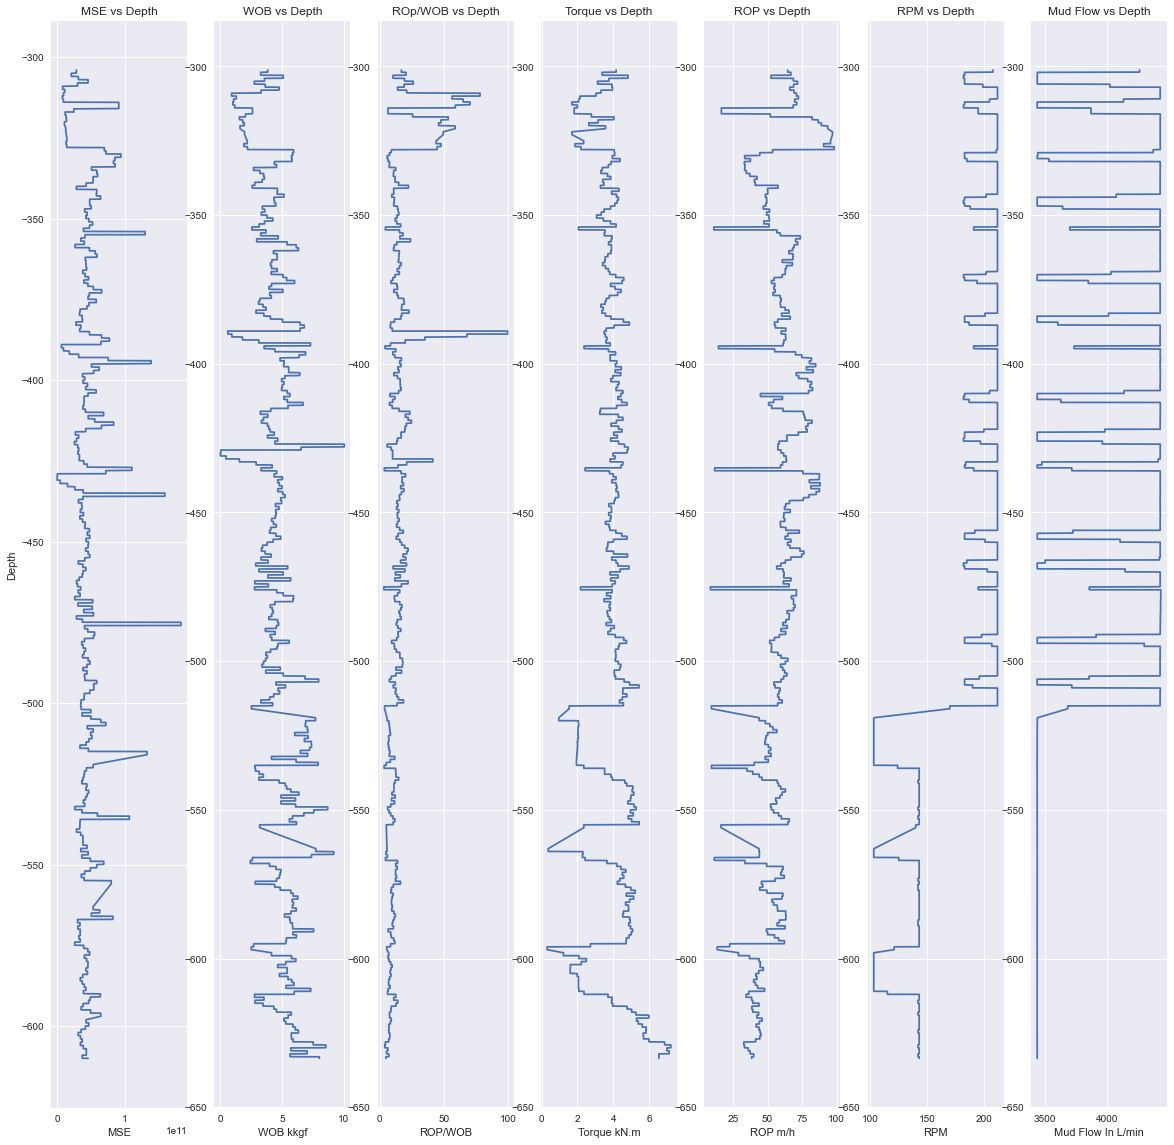

In [28]:
#F_7
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize = (20,20))
ax1.plot(F_7_MSE.MSE.values,MD_7)
ax1.set_xlabel('MSE');
ax1.set_ylabel('Depth');
ax1.set_title('MSE vs Depth');

ax2.plot(F_7_MSE.WOB.values,MD_7)
ax2.set_xlabel('WOB kkgf');
ax2.set_title('WOB vs Depth');

ax3.plot(ROP_WOB_relation_7,MD_7)
ax3.set_xlabel('ROP/WOB');
ax3.set_title('ROp/WOB vs Depth');

ax4.plot(F_7_MSE.Torque.values,MD_7)
ax4.set_xlabel('Torque kN.m');
ax4.set_title('Torque vs Depth');

ax5.plot(F_7_MSE.ROP.values,MD_7)
ax5.set_xlabel('ROP m/h');
ax5.set_title('ROP vs Depth');

ax6.plot(F_7_MSE.RPM,MD_7)
ax6.set_xlabel('RPM');
ax6.set_title('RPM vs Depth');

ax7.plot(F_7['Mud Flow In L/min'].values,MD_7)
ax7.set_xlabel('Mud Flow In L/min');
ax7.set_title('Mud Flow vs Depth');

In [56]:
F_14_MSE[F_14_MSE.MSE>1.1*10**12].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 29119 to 39651
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MD        972 non-null    float64
 1   WOB       972 non-null    float64
 2   Torque    972 non-null    float64
 3   ROP       972 non-null    float64
 4   RPM       972 non-null    float64
 5   Diameter  972 non-null    float64
 6   incl      972 non-null    float64
 7   MSE       972 non-null    float64
dtypes: float64(8)
memory usage: 68.3 KB


In [57]:
F_14_MSE.loc[F_14_MSE.MSE>1.1*10**12,['MSE']] = 1.1*10**12

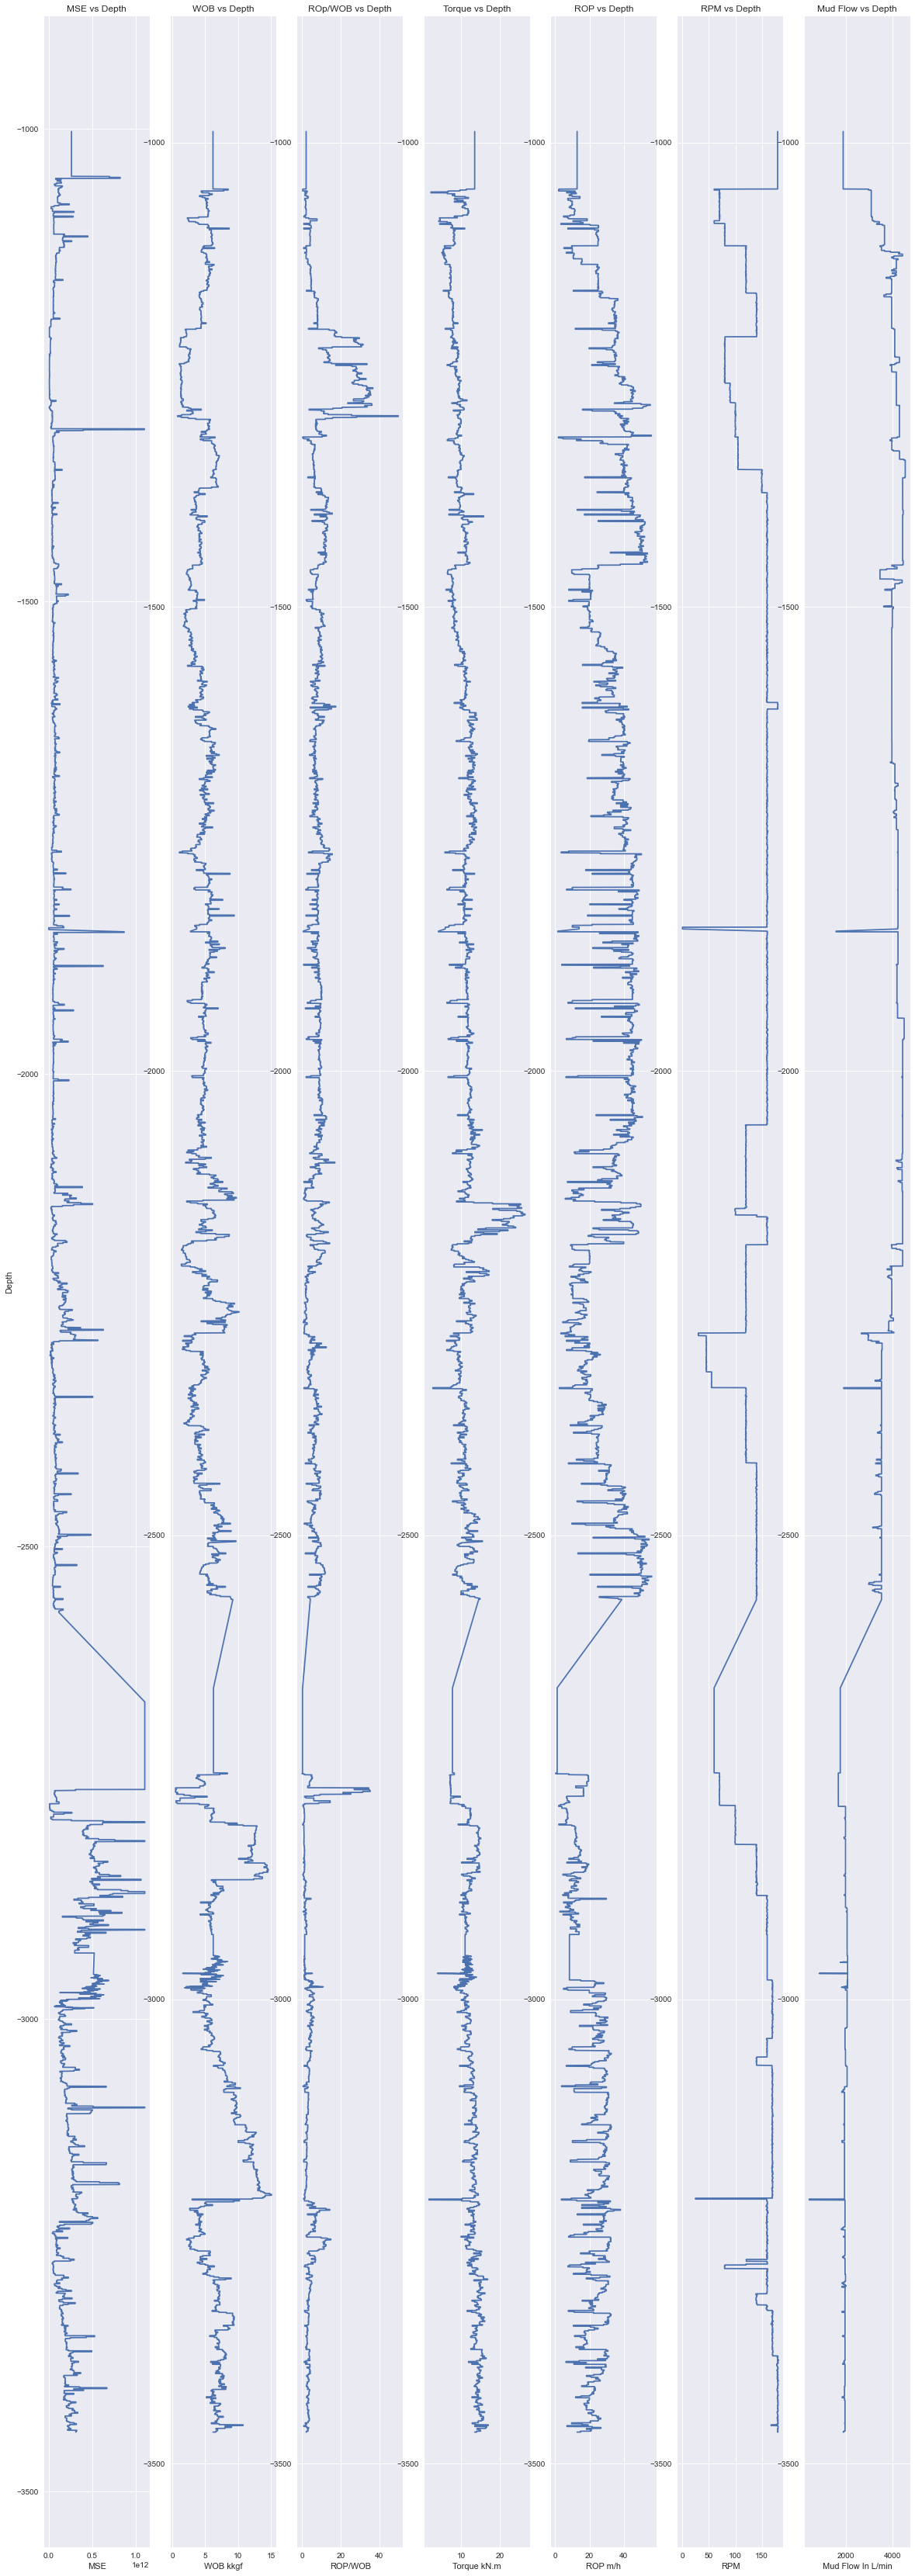

In [82]:
#F_14
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize = (20,60))
ax1.plot(F_14_MSE.MSE.values,MD_14)
ax1.set_xlabel('MSE');
ax1.set_ylabel('Depth');
ax1.set_title('MSE vs Depth');

ax2.plot(F_14_MSE.WOB.values,MD_14)
ax2.set_xlabel('WOB kkgf');
ax2.set_title('WOB vs Depth');

ax3.plot(ROP_WOB_relation_14,MD_14)
ax3.set_xlabel('ROP/WOB');
ax3.set_title('ROp/WOB vs Depth');

ax4.plot(F_14_MSE.Torque.values,MD_14)
ax4.set_xlabel('Torque kN.m');
ax4.set_title('Torque vs Depth');

ax5.plot(F_14_MSE.ROP.values,MD_14)
ax5.set_xlabel('ROP m/h');
ax5.set_title('ROP vs Depth');

ax6.plot(F_14_MSE.RPM,MD_14)
ax6.set_xlabel('RPM');
ax6.set_title('RPM vs Depth');

ax7.plot(F_14['Mud Flow In L/min'].values,MD_14)
ax7.set_xlabel('Mud Flow In L/min');
ax7.set_title('Mud Flow vs Depth');

In [67]:
F_15_MSE[F_15_MSE.MSE>0.7*10**12].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 20054 to 52359
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MD        618 non-null    float64
 1   WOB       618 non-null    float64
 2   Torque    618 non-null    float64
 3   ROP       618 non-null    float64
 4   RPM       618 non-null    float64
 5   Diameter  618 non-null    float64
 6   incl      618 non-null    float64
 7   MSE       618 non-null    float64
dtypes: float64(8)
memory usage: 43.5 KB


In [68]:
F_15_MSE.loc[F_15_MSE.MSE>0.7*10**12,['MSE']] = 0.7*10**12

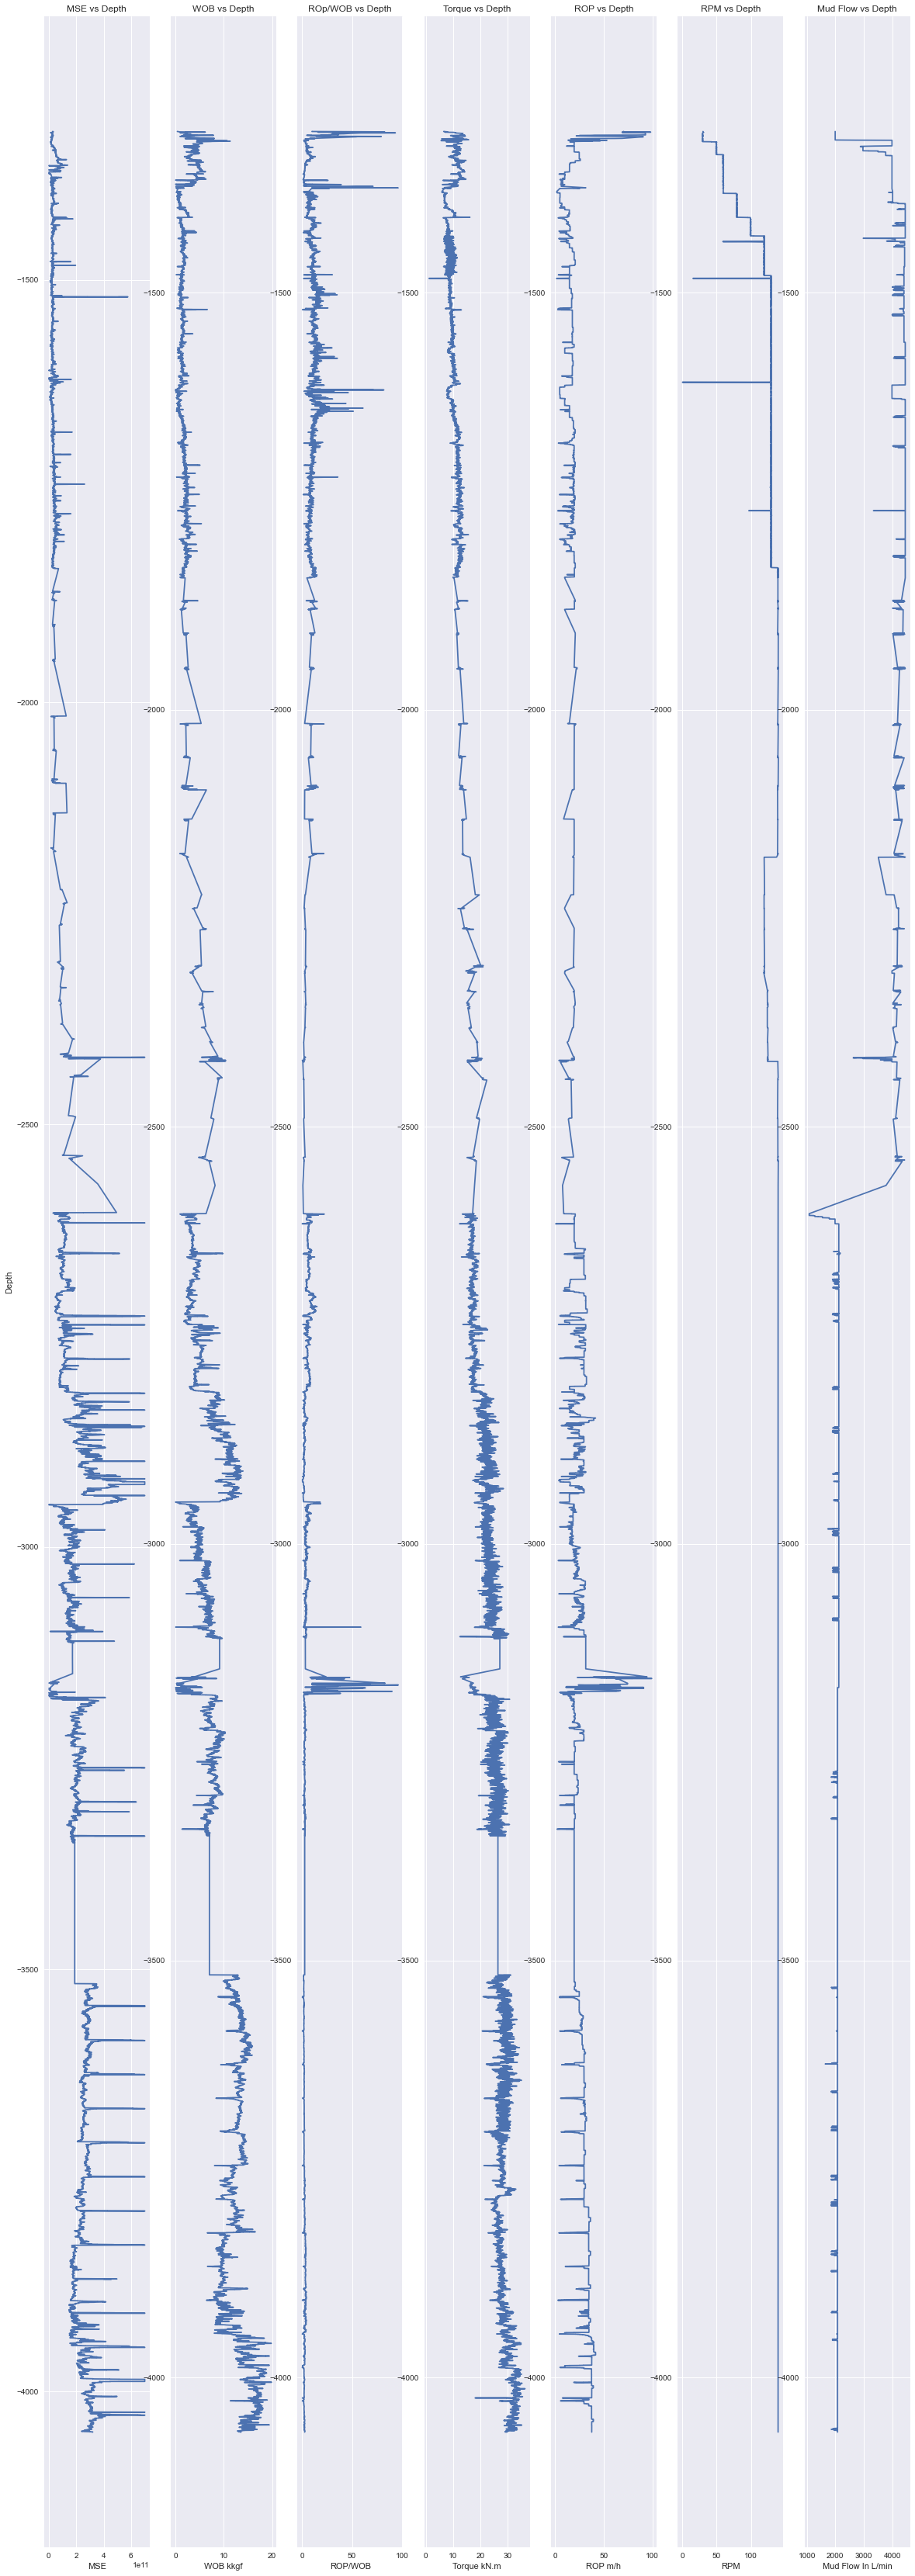

In [83]:
#F_15
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize = (20,60))
ax1.plot(F_15_MSE.MSE.values,MD_15)
ax1.set_xlabel('MSE');
ax1.set_ylabel('Depth');
ax1.set_title('MSE vs Depth');

ax2.plot(F_15_MSE.WOB.values,MD_15)
ax2.set_xlabel('WOB kkgf');
ax2.set_title('WOB vs Depth');

ax3.plot(ROP_WOB_relation_15,MD_15)
ax3.set_xlabel('ROP/WOB');
ax3.set_title('ROp/WOB vs Depth');

ax4.plot(F_15_MSE.Torque.values,MD_15)
ax4.set_xlabel('Torque kN.m');
ax4.set_title('Torque vs Depth');

ax5.plot(F_15_MSE.ROP.values,MD_15)
ax5.set_xlabel('ROP m/h');
ax5.set_title('ROP vs Depth');

ax6.plot(F_15_MSE.RPM,MD_15)
ax6.set_xlabel('RPM');
ax6.set_title('RPM vs Depth');

ax7.plot(F_15['Mud Flow In L/min'].values,MD_15)
ax7.set_xlabel('Mud Flow In L/min');
ax7.set_title('Mud Flow vs Depth');

In [76]:
F_15S_MSE[F_15S_MSE.MSE>0.2*10**12].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1098 to 16841
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MD        583 non-null    float64
 1   WOB       583 non-null    float64
 2   Torque    583 non-null    float64
 3   ROP       583 non-null    float64
 4   RPM       583 non-null    float64
 5   Diameter  583 non-null    float64
 6   incl      583 non-null    float64
 7   MSE       583 non-null    float64
dtypes: float64(8)
memory usage: 41.0 KB


In [77]:
F_15S_MSE.loc[F_15S_MSE.MSE>0.2*10**12,['MSE']] = 0.2*10**12

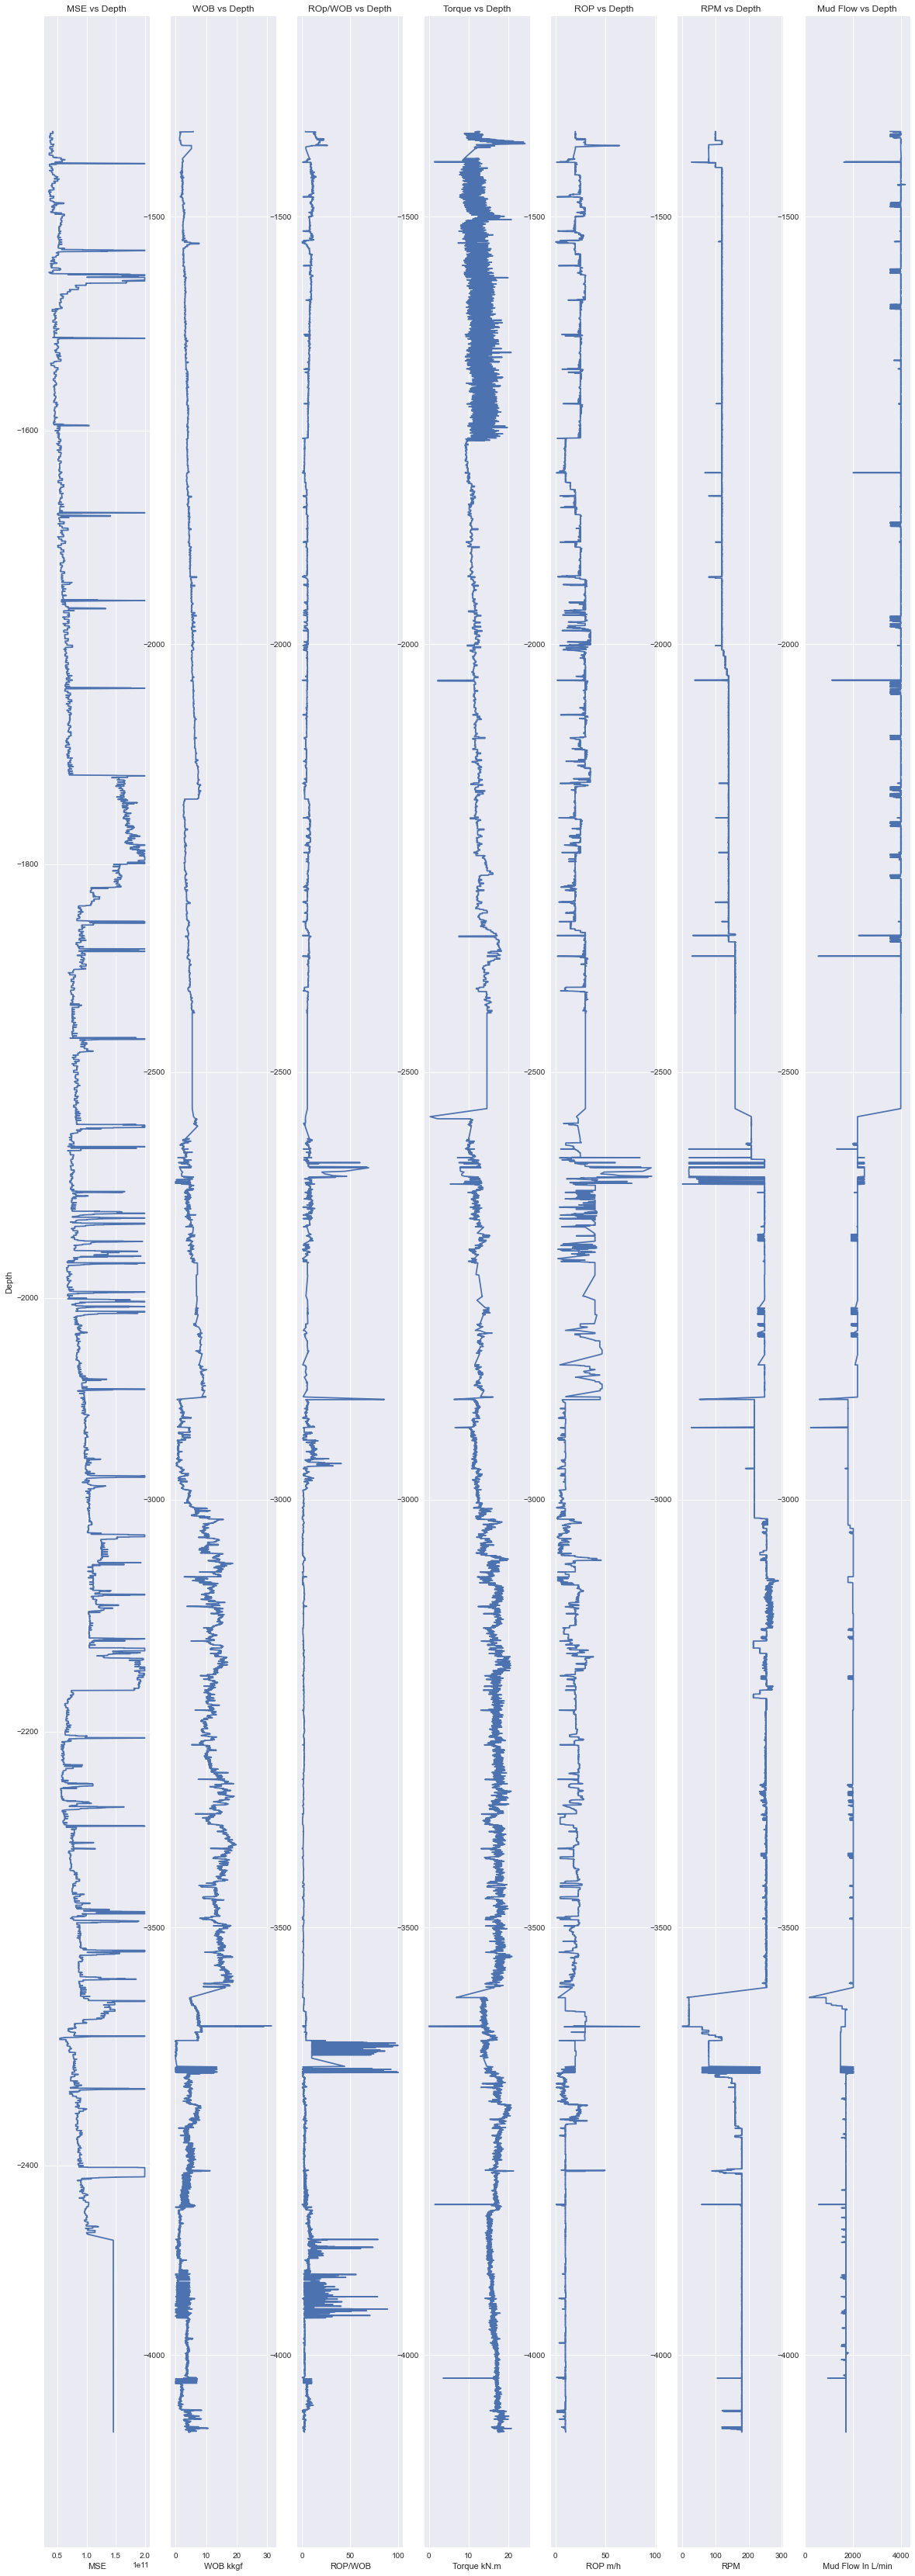

In [84]:
#F_15S
plt.style.use('seaborn')
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize = (20,60))
ax1.plot(F_15S_MSE.MSE.values,MD_15S)
ax1.set_xlabel('MSE');
ax1.set_ylabel('Depth');
ax1.set_title('MSE vs Depth');

ax2.plot(F_15S_MSE.WOB.values,MD_15S)
ax2.set_xlabel('WOB kkgf');
ax2.set_title('WOB vs Depth');

ax3.plot(ROP_WOB_relation_15S,MD_15S)
ax3.set_xlabel('ROP/WOB');
ax3.set_title('ROp/WOB vs Depth');

ax4.plot(F_15S_MSE.Torque.values,MD_15S)
ax4.set_xlabel('Torque kN.m');
ax4.set_title('Torque vs Depth');

ax5.plot(F_15S_MSE.ROP.values,MD_15S)
ax5.set_xlabel('ROP m/h');
ax5.set_title('ROP vs Depth');

ax6.plot(F_15S_MSE.RPM,MD_15S)
ax6.set_xlabel('RPM');
ax6.set_title('RPM vs Depth');

ax7.plot(F_15S['Mud Flow In L/min'].values,MD_15S)
ax7.set_xlabel('Mud Flow In L/min');
ax7.set_title('Mud Flow vs Depth');

In [32]:
F_9A_MSE[F_9A_MSE['WOB']>16].head(20)

,MD,WOB,Torque,ROP,RPM,Diameter,incl,MSE
4139,-687.324,16.256751,2.264216,36.100512,104.0,311.15,28.690901,1.685314e+11
4140,-687.367,16.256751,2.264216,36.100512,104.0,311.15,28.692991,1.685292e+11
4141,-687.418,16.256751,2.264216,36.100512,104.0,311.15,28.695081,1.685271e+11
4142,-687.461,16.256751,2.264216,36.100512,104.0,311.15,28.697171,1.685249e+11
4231,-691.286,16.029954,2.277774,38.956488,104.0,311.15,28.883187,1.538165e+11
4232,-691.326,16.029954,2.277774,38.956488,104.0,311.15,28.885277,1.538146e+11
4233,-691.387,16.029954,2.277774,38.956488,104.0,311.15,28.887367,1.538126e+11
4234,-691.436,16.029954,2.277774,38.956488,104.0,311.15,28.889457,1.538107e+11
5673,-755.294,16.156960,2.250658,32.705040,104.0,311.15,32.727657,1.803830e+11
5674,-755.334,16.156960,2.250658,32.705040,104.0,311.15,32.731053,1.803792e+11
